## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [76]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

King County House Sales dataset.<br>

**id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [77]:
#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
df = pd.read_csv('kc_house_data.csv')

In [78]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [79]:
df.shape

(21597, 21)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [81]:
df.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.00,21597.000
mean,4.580474e+09,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.62,12758.284
std,2.876736e+09,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.23,27274.442
min,1.000102e+06,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.00,651.000
25%,2.123049e+09,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.00,5100.000
50%,3.904930e+09,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.00,7620.000
75%,7.308900e+09,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.00,10083.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.00,871200.000


In [82]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [83]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Null Values

In [84]:
#do any rows have duplicate data.
duplicates = df[df.duplicated()]
print(len(duplicates))

0


In [85]:
#missing values
# waterfront 2376   11%
#view        63     0.2%
# yr_renovated 3842 17.789%
df.isnull().sum() * 100/ len(df)

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

In [86]:
#waterfront - House which has a view to a waterfront
print(df['waterfront'].value_counts(dropna=False) )
print('---------')
print(df['waterfront'].value_counts(dropna=False) * 100 / len(df['waterfront']))

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64
---------
0.0    88.322452
NaN    11.001528
1.0     0.676020
Name: waterfront, dtype: float64


In [87]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [88]:
housing_df = df.copy()

In [89]:
housing_df['waterfront'].isnull().sum()

2376

In [90]:

try:
    housing_df['waterfront'].fillna(value=housing_df['waterfront'].mode()[0], inplace=True)
except:
    print('not in the dataframe.')        

In [91]:
housing_df['waterfront'].isnull().sum()

0

In [92]:
# 21,597
housing_df['waterfront'].value_counts(dropna=False)

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [93]:
#years renovated
#yr_renovated 
#it looks like the majority of homes weren't renovated or 78% of variable

print(df['yr_renovated'].value_counts(dropna=False))
print('---------------')
print(df['yr_renovated'].value_counts(dropna=False) *100 / len(df['yr_renovated']))

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64
---------------
0.0       78.765569
NaN       17.789508
2014.0     0.338010
2003.0     0.143538
2013.0     0.143538
            ...    
1944.0     0.004630
1948.0     0.004630
1976.0     0.004630
1934.0     0.004630
1953.0     0.004630
Name: yr_renovated, Length: 71, dtype: float64


In [94]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [95]:
try:
    housing_df['yr_renovated'].fillna(value=housing_df['yr_renovated'].mode()[0], inplace=True)
except:
    print('not in the dataframe.')   

In [96]:
housing_df['yr_renovated'].value_counts() 

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [97]:
housing_df['yr_renovated'].isnull().sum()

0

In [98]:
#housing_1 = housing_df.copy()

In [99]:
#NaN for view doesn't even make 1% so I'm going to drop them 
#view             0.291707 
#data = data.dropna(subset=['sms'])
housing_df = housing_df.dropna(subset=['view'])

In [100]:
housing_df['view'].isnull().sum()

0

In [101]:
housing_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Convert Object Datatypes

In [102]:
#df.loc[:, df.dtypes == object]
housing_df.loc[:, housing_df.dtypes == object]

,date,sqft_basement
0,10/13/2014,0.0
1,12/9/2014,400.0
2,2/25/2015,0.0
3,12/9/2014,910.0
4,2/18/2015,0.0
...,...,...
21592,5/21/2014,0.0
21593,2/23/2015,0.0
21594,6/23/2014,0.0
21595,1/16/2015,0.0


In [103]:
#sqft_basement - square footage of the basement
housing_df['sqft_basement'].value_counts()

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
1275.0        1
1284.0        1
1960.0        1
243.0         1
225.0         1
Name: sqft_basement, Length: 302, dtype: int64

In [104]:
housing_df['sqft_basement'].value_counts() *100 / len(housing_df['sqft_basement'])

0.0       59.431597
?          2.099006
600.0      1.003065
500.0      0.970558
700.0      0.961271
            ...    
1275.0     0.004644
1284.0     0.004644
1960.0     0.004644
243.0      0.004644
225.0      0.004644
Name: sqft_basement, Length: 302, dtype: float64

In [105]:
housing_df["sqft_basement"] = housing_df["sqft_basement"].replace("?", '0.0')

In [106]:
housing_df['sqft_basement'].value_counts()

0.0       13250
600.0       216
500.0       209
700.0       207
800.0       201
          ...  
588.0         1
1275.0        1
1284.0        1
1960.0        1
225.0         1
Name: sqft_basement, Length: 301, dtype: int64

In [107]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [108]:
#housing_1 = housing_df.copy()
housing_df['sqft_basement']  = housing_df['sqft_basement'].astype('float64')

In [109]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.6+ MB


Convert date

In [110]:
#housing_1 = housing_df.copy()
housing_df['date'] = pd.to_datetime(housing_df['date'])

In [111]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null datetime64[ns]
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.6

In [112]:
housing_df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [113]:
#date doesn't show up
housing_df.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000
mean,4.582351e+09,540057.664,3.373,2.116,2079.828,15090.596,1.494,0.007,0.234,3.410,7.657,1788.558,285.244,1971.002,68.867,98077.939,47.560,-122.214,1986.300,12751.080
std,2.876779e+09,366059.581,0.926,0.769,917.447,41380.210,0.540,0.082,0.766,0.651,1.173,827.746,439.334,29.376,364.315,53.507,0.139,0.141,685.121,27255.483
min,1.000102e+06,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2.123212e+09,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3.904945e+09,450000.000,3.000,2.250,1910.000,7617.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7.312175e+09,645000.000,4.000,2.500,2550.000,10687.750,2.000,0.000,0.000,4.000,8.000,2210.000,550.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


Which independent variables are categories?

In [114]:
housing_df['bedrooms'].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [115]:
housing_df['bathrooms'].value_counts()

2.50    5364
1.00    3841
1.75    3035
2.25    2037
2.00    1926
1.50    1441
2.75    1185
3.00     752
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       5
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [116]:
housing_df['floors'].value_counts()

1.0    10643
2.0     8211
1.5     1903
3.0      611
2.5      159
3.5        7
Name: floors, dtype: int64

In [117]:
housing_df['waterfront'].value_counts()

0.0    21389
1.0      145
Name: waterfront, dtype: int64

In [118]:
#view-has been viewed
housing_df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [119]:
#condition - How good the condition is (Overall)
housing_df['condition'].value_counts()

3    13981
4     5657
5     1697
2      170
1       29
Name: condition, dtype: int64

In [120]:
#yr_renovated - Year when house was renovated
housing_df['yr_renovated'].value_counts()

0.0       20791
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [121]:
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

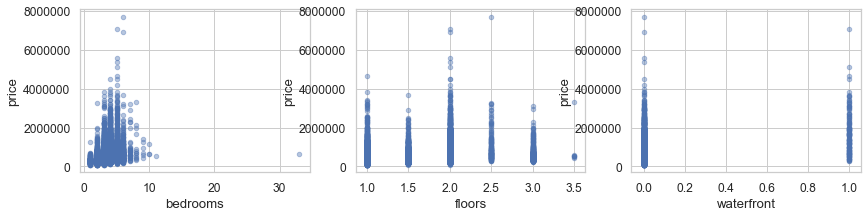

In [122]:
#cat_columns = ['bedrooms', 'floors', 'waterfront', 
#               'view', 'condition', 'grade']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,3))

for xcol, ax in zip(['bedrooms','floors', 'waterfront'], axes):
    housing_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


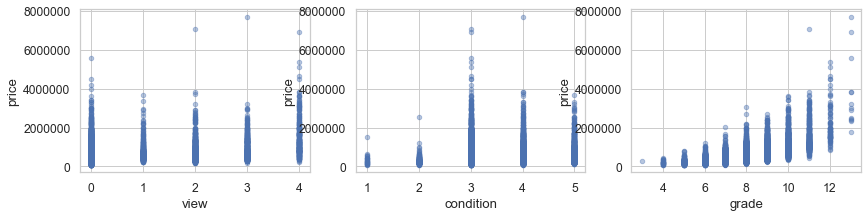

In [123]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,3))

for xcol, ax in zip(['view', 'condition', 'grade'], axes):
    housing_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

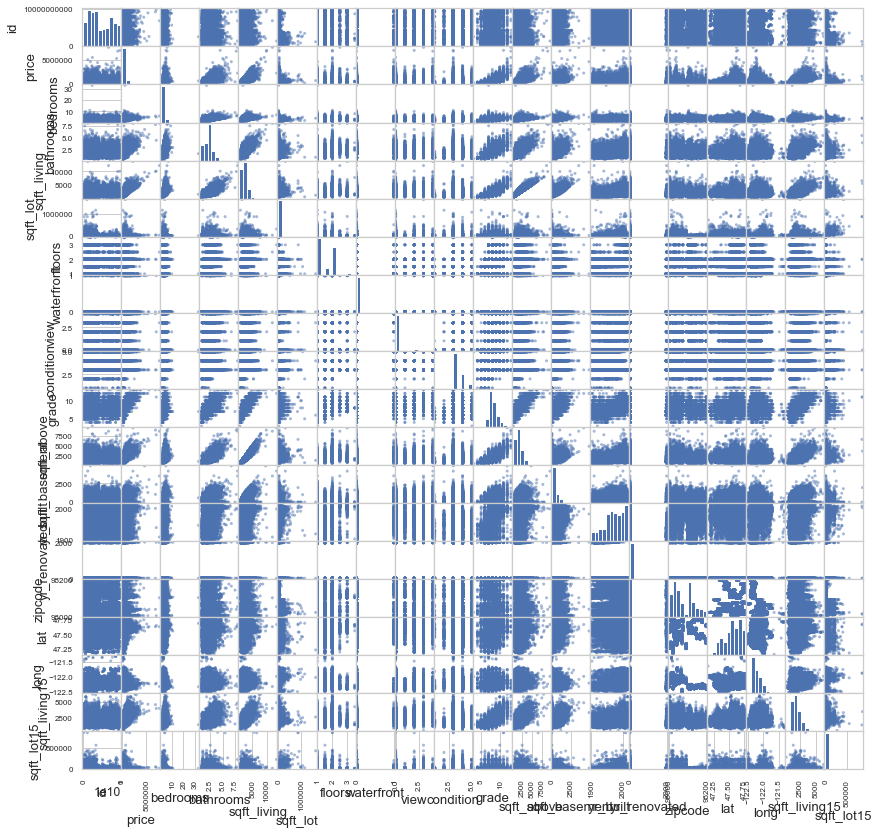

In [124]:
pd.plotting.scatter_matrix(housing_df, figsize=(14,14));

Target

In [125]:
len(housing_df['price'].unique())

3613

In [126]:
housing_df['price'].describe().round(3)

count      21534.000
mean      540057.664
std       366059.581
min        78000.000
25%       322000.000
50%       450000.000
75%       645000.000
max      7700000.000
Name: price, dtype: float64

In [127]:
bins = [77000, 320000,440000,640000,700000]
bins_price = pd.cut(housing_df['price'], bins)
bins_price = bins_price.cat.as_ordered()
bins_price.head()

0     (77000, 320000]
1    (440000, 640000]
2     (77000, 320000]
3    (440000, 640000]
4    (440000, 640000]
Name: price, dtype: category
Categories (4, interval[int64]): [(77000, 320000] < (320000, 440000] < (440000, 640000] < (640000, 700000]]

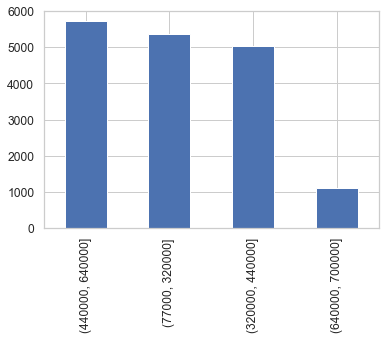

In [128]:
bins_price.value_counts().plot(kind='bar')

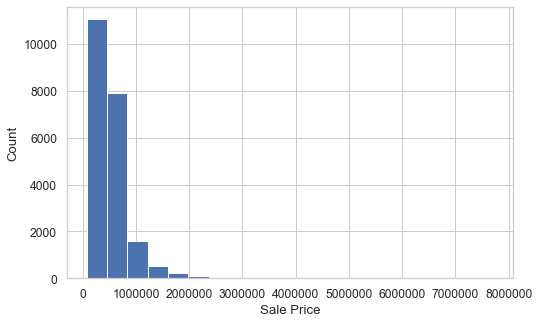

In [129]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    housing_df['price'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

Collinearity

In [139]:
def multiplot(corr,figsize=(25,10)):
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True

    sns.heatmap(np.abs(corr),square=True, mask=mask,annot=True,cmap="Reds",ax=ax)
    return fig, ax


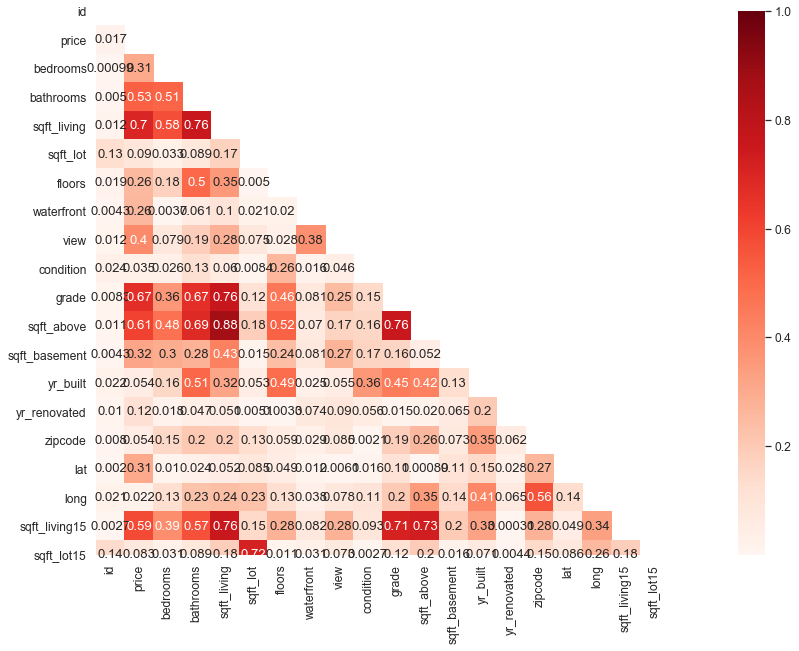

In [140]:
multiplot(np.abs(housing_df.corr()));

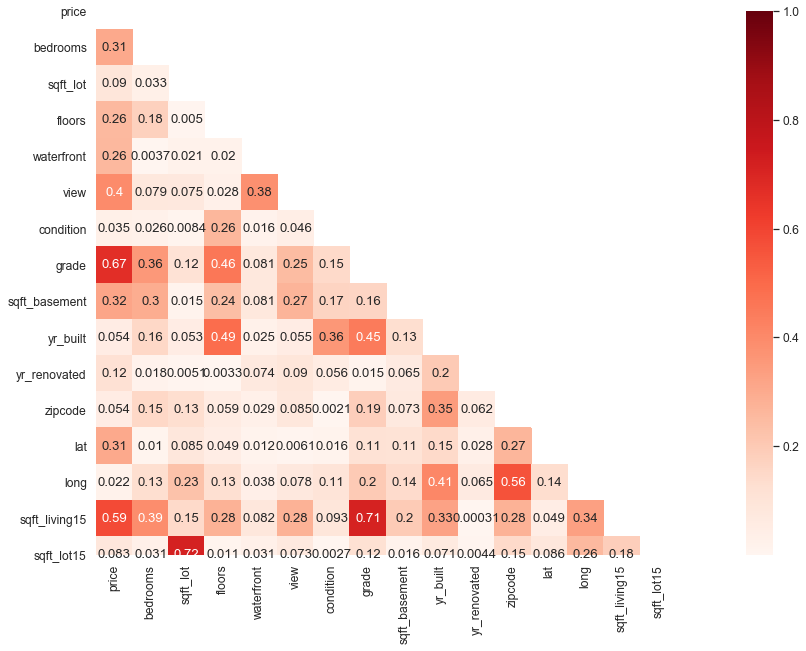

In [145]:
#sqft_living and bathrooms = bathrooms=0.76 / cut bathrooms
#grade and sqft_living=0.76  / cut sqft_living
#sqft_above and sqfit_living = 0.88 / cut sqft_living
#sqft_above and grade = 0.76 / sqft_above
colli_cols = ['price', 'bedrooms', 'sqft_lot', 'floors', 
              'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 
              'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

df_collin = housing_df[colli_cols]
multiplot(np.abs(df_collin.corr()));

In [146]:
df_collin.columns

Index(['price', 'bedrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [148]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('fivethirtyeight')

In [150]:
outcome = 'price'
x_cols = ['bedrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = smf.ols(formula=formula, data=df_collin).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2711.
Date:                Sat, 09 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:26:39   Log-Likelihood:            -2.9499e+05
No. Observations:               21534   AIC:                         5.900e+05
Df Residuals:                   21518   BIC:                         5.901e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.456e+07   3.14e+06      4.643      0.000    8.41e+06    2.07e+07
bedrooms       1.064e+04   1830.874      5.810      0.000    7048.455    1.42e+04
sqft_lot          0.3144      0.051      6.139      0.000       0.214       0.415
floors         6.949e+04   3580.081     19.411      0.000    6.25e+04    7.65e+04
waterfront     6.418e+05   1.95e+04     32.965      0.000    6.04e+05     6.8e+05
view           5.464e+04   2273.422     24.034      0.000    5.02e+04    5.91e+04
condition      2.858e+04   2507.718     11.398      0.000    2.37e+04    3.35e+04
grade          1.524e+05   2070.018     73.617      0.000    1.48e+05    1.56e+05
sqft_basement    94.3437      4.017     23.485      0.000      86.470     102.218
yr_built      -2545.6511     72.807    -34.965      0.000   -2688.357   -2402.945
yr_renovated     38.5106      4.225      9.114      0.000      30.229      46.793
zipcode        -555.2502     35.346    -15.709      0.000    -624.532    -485.968
lat            5.621e+05   1.15e+04     48.970      0.000     5.4e+05    5.85e+05
long          -1.397e+05    1.4e+04     -9.978      0.000   -1.67e+05   -1.12e+05
sqft_living15    99.2713      3.369     29.464      0.000      92.667     105.875
sqft_lot15       -0.2099      0.078     -2.676      0.007      -0.364      -0.056
==============================================================================
Omnibus:                    21719.637   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3933252.822
Skew:                           4.569   Prob(JB):                         0.00
Kurtosis:                      68.576   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""